# EDA Analysis of Raw NBA DATA

In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'

os.chdir('..') #change to parent directory

from pathlib import Path  #for Windows/Linux compatibility
DATAPATH = Path(r'data')


## games_traditional.csv


In [2]:

games = pd.read_csv(DATAPATH / "games_traditional.csv")
games.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_11896\575550689.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv(DATAPATH / "games_traditional.csv")


,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID
0,MIA,MIA @ BOS,04/19/2006,L,240,78,23,71,32.4,5,13,38.5,27,37,73.0,7,35,42,12,9,3,15,23,-7,1610612748,20501219
1,DAL,DAL vs. LAC,04/19/2006,L,240,71,26,70,37.1,1,5,20.0,18,33,54.5,10,31,41,6,8,8,12,19,-14,1610612742,20501226
2,MIN,MIN vs. MEM,04/19/2006,L,290,92,34,97,35.1,6,25,24.0,18,23,78.3,11,34,45,23,11,5,17,18,-10,1610612750,20501224
3,NYK,NYK @ NJN,04/19/2006,W,240,90,33,62,53.2,3,15,20.0,21,28,75.0,9,28,37,24,4,7,18,16,7,1610612752,20501220
4,NJN,NJN vs. NYK,04/19/2006,L,240,83,32,81,39.5,8,24,33.3,11,14,78.6,15,21,36,24,9,1,12,23,-7,1610612751,20501220


for description of the different stats, see https://www.nba.com/stats/help/glossary

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48474 entries, 0 to 48473
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Team       48474 non-null  object
 1   Match Up   48474 non-null  object
 2   Game Date  48474 non-null  object
 3   W/L        48472 non-null  object
 4   MIN        48474 non-null  int64 
 5   PTS        48474 non-null  int64 
 6   FGM        48474 non-null  int64 
 7   FGA        48474 non-null  int64 
 8   FG%        48474 non-null  object
 9   3PM        48474 non-null  int64 
 10  3PA        48474 non-null  int64 
 11  3P%        48474 non-null  object
 12  FTM        48474 non-null  int64 
 13  FTA        48474 non-null  int64 
 14  FT%        48474 non-null  object
 15  OREB       48474 non-null  int64 
 16  DREB       48474 non-null  int64 
 17  REB        48474 non-null  int64 
 18  AST        48474 non-null  int64 
 19  STL        48474 non-null  int64 
 20  BLK        48474 non-null  i

FG%, 3P%, FT%, should be numeric, but they are object. We will need to investigate why they are object.

###
### Check for duplicates and nulls

In [4]:
# duplicates
games.duplicated().sum()

0

In [5]:
#null values
games.isnull().sum()

Team         0
Match Up     0
Game Date    0
W/L          2
MIN          0
PTS          0
FGM          0
FGA          0
FG%          0
3PM          0
3PA          0
3P%          0
FTM          0
FTA          0
FT%          0
OREB         0
DREB         0
REB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
+/-          0
TEAM_ID      0
GAME_ID      0
dtype: int64

In [6]:
#show the nulls
games[games.isna().any(axis=1)]

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID
17942,IND,IND @ BOS,04/16/2013,NaN,0,0,0,0,-,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,1610612754,21201214
17943,BOS,BOS vs. IND,04/16/2013,NaN,0,0,0,0,-,0,0,-,0,0,-,0,0,0,0,0,0,0,0,0,1610612738,21201214


A little bit of Google research revealed that this game was scheduled but was not played on this date due to a bombing at the Boston Marathon.

Also note that the dash marks in the box score are forcing pandas to read the FG%, 3P%, FT% columns as strings. 

We will delete these rows and see if that fixes the issue with non-numeric columns.

In [7]:
#drop the rows that have nulls in W/L column
games = games.dropna(subset=['W/L'])

games.isnull().sum()

Team         0
Match Up     0
Game Date    0
W/L          0
MIN          0
PTS          0
FGM          0
FGA          0
FG%          0
3PM          0
3PA          0
3P%          0
FTM          0
FTA          0
FT%          0
OREB         0
DREB         0
REB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
+/-          0
TEAM_ID      0
GAME_ID      0
dtype: int64

In [8]:
# check for more dashes in FG%, 3P%, FT% and report the count
print(games['FG%'].str.contains('-').sum())
print(games['3P%'].str.contains('-').sum())
print(games['FT%'].str.contains('-').sum())

 

0
0
1


In [9]:
# take a look at the rows with dashes in FT%
games[games['FT%'].str.contains('-')]


,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID
45987,BOS,BOS @ MIL,04/09/2024,L,240,91,37,93,39.8,17,52,32.7,0,0,-,12,26,38,27,11,4,12,8,-13,1610612738,22301148


A little bit of Google research revealed that Boston in fact had no Free Throws in this game. This is why the FT% is a dash.

This is an extremely rare occurrence, but we will need to have a step in our data prep pipeline to convert dashes to 0s in the FT% and other calculated columns.

In [10]:
# convert these columns to numeric and coerce errors
games['FG%'] = pd.to_numeric(games['FG%'], errors='coerce')
games['3P%'] = pd.to_numeric(games['3P%'], errors='coerce')
games['FT%'] = pd.to_numeric(games['FT%'], errors='coerce')

# replace nulls in these columns with 0
games['FG%'] = games['FG%'].fillna(0)
games['3P%'] = games['3P%'].fillna(0)
games['FT%'] = games['FT%'].fillna(0)

# check this row again and make sure FT% is now 0
games[games['GAME_ID'] == 22301148]

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID
45986,MIL,MIL vs. BOS,04/09/2024,W,240,104,43,81,53.1,17,36,47.2,1,2,50.0,10,39,49,29,6,5,18,4,13,1610612749,22301148
45987,BOS,BOS @ MIL,04/09/2024,L,240,91,37,93,39.8,17,52,32.7,0,0,0.0,12,26,38,27,11,4,12,8,-13,1610612738,22301148


Our data prep pipeline so far will be:

1. Remove rows with nulls in W/L column
2. Convert FG%, 3P%, FT% to numeric and coerce errors to nulls
3. Convert nulls to 0s in FT% (and other calculated columns)


NOTE - GAME_ID format: 

- 1st digit: 1=pre-season, 2=regular season, >2 = post season,  
- 2nd & 3rd digit: last two digits of season year (eg 103######## represents preseason game in 2003-04 season)

In [11]:
category_fields = ['TEAM_ID', 'W/L']

for cat in category_fields:
    games[cat] = games[cat].astype('category')

games.describe(include = 'category').T

,count,unique,top,freq
W/L,48472,2,L,24236
TEAM_ID,48472,30,1610612738,1726


In [12]:
games.describe().T.applymap('{:,.2f}'.format)

C:\Users\Chris\AppData\Local\Temp\ipykernel_11896\1232942025.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  games.describe().T.applymap('{:,.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
MIN,"48,472.00",241.73,7.45,240.00,240.00,240.00,240.00,340.00
PTS,"48,472.00",103.95,13.63,54.00,94.00,104.00,113.00,176.00
FGM,"48,472.00",38.56,5.48,16.00,35.00,38.00,42.00,65.00
FGA,"48,472.00",84.10,7.98,51.00,79.00,84.00,89.00,129.00
FG%,"48,472.00",45.94,5.60,24.60,42.10,45.80,49.50,68.70
3PM,"48,472.00",8.88,4.26,0.00,6.00,8.00,12.00,29.00
3PA,"48,472.00",24.80,9.49,1.00,17.00,24.00,32.00,70.00
3P%,"48,472.00",35.54,10.55,0.00,28.60,35.50,42.30,100.00
FTM,"48,472.00",17.95,6.15,0.00,14.00,18.00,22.00,52.00
FTA,"48,472.00",23.52,7.55,0.00,18.00,23.00,28.00,64.00


NOTE - MIN is the total minutes played by all 5 players on the court for a team. It is expressed this way because individual player statistics are a big part of the NBA website, and this is a way to keep the team statistics consistent with the individual statistics.

Before moving further along wit each of the data files, I want to check and see how many games are in each file to make sure things align properly. This might save me some time later.

In [13]:
games = pd.read_csv(DATAPATH / "games_advanced.csv")
games.head()

,Team,Match Up,Game Date,W/L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,TEAM_ID,GAME_ID
0,SEA,SEA vs. DEN,04/19/2006,W,48,104.8,94.2,10.6,63.9,1.44,17.4,14.0,63.5,41.1,15.4,53.2,60.0,104.00,57.2,1610612760,20501230
1,MEM,MEM @ MIN,04/19/2006,W,58,96.2,86.0,10.2,68.3,1.33,18.9,29.4,69.7,52.1,19.8,51.1,52.7,88.14,59.8,1610612763,20501224
2,DET,DET vs. WAS,04/19/2006,L,48,87.0,103.2,-16.3,61.3,1.12,15.3,29.2,63.2,47.6,18.5,43.5,46.1,92.50,43.8,1610612765,20501222
3,LAL,LAL vs. NOK,04/19/2006,W,48,122.3,101.1,21.3,48.9,2.20,17.3,25.6,68.9,47.7,10.6,58.0,61.1,94.00,60.3,1610612747,20501229
4,ATL,ATL @ CLE,04/19/2006,L,48,104.2,105.3,-1.1,55.9,2.11,15.3,19.2,60.9,38.8,9.5,46.3,52.6,95.00,48.8,1610612737,20501217


In [14]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48472 entries, 0 to 48471
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       48472 non-null  object 
 1   Match Up   48472 non-null  object 
 2   Game Date  48472 non-null  object 
 3   W/L        48472 non-null  object 
 4   MIN        48472 non-null  int64  
 5   OffRtg     48472 non-null  float64
 6   DefRtg     48472 non-null  float64
 7   NetRtg     48472 non-null  float64
 8   AST%       48472 non-null  float64
 9   AST/TO     48472 non-null  float64
 10  AST Ratio  48472 non-null  float64
 11  OREB%      48472 non-null  float64
 12  DREB%      48472 non-null  float64
 13  REB%       48472 non-null  float64
 14  TOV%       48472 non-null  float64
 15  eFG%       48472 non-null  float64
 16  TS%        48472 non-null  float64
 17  PACE       48472 non-null  float64
 18  PIE        48472 non-null  float64
 19  TEAM_ID    48472 non-null  int64  
 20  GAME_I

In [15]:
games = pd.read_csv(DATAPATH / "games_four-factors.csv")
games.head()

,TEAM,MATCH UP,GAME DATE,W/L,MIN,eFG%,FTA Rate,TOV%,OREB%,Opp eFG%,Opp FTA Rate,Opp TOV%,Opp OREB%,TEAM_ID,GAME_ID
0,WAS,WAS @ DET,04/19/2006,W,48,44.0,0.242,12.9,36.8,43.5,0.286,18.5,29.2,1610612764,20501222
1,CLE,CLE vs. ATL,04/19/2006,W,48,49.3,0.562,22.1,39.1,46.3,0.400,9.5,19.2,1610612739,20501217
2,PHX,PHX @ POR,04/19/2006,W,48,53.2,0.084,20.8,43.4,46.1,0.434,15.6,25.0,1610612756,20501228
3,DET,DET vs. WAS,04/19/2006,L,48,43.5,0.286,18.5,29.2,44.0,0.242,12.9,36.8,1610612765,20501222
4,MIA,MIA @ BOS,04/19/2006,L,48,35.9,0.521,16.1,17.3,38.7,0.427,17.0,26.0,1610612748,20501219


In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48472 entries, 0 to 48471
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TEAM          48472 non-null  object 
 1   MATCH UP      48472 non-null  object 
 2   GAME DATE     48472 non-null  object 
 3   W/L           48472 non-null  object 
 4   MIN           48472 non-null  int64  
 5   eFG%          48472 non-null  float64
 6   FTA Rate      48472 non-null  float64
 7   TOV%          48472 non-null  float64
 8   OREB%         48472 non-null  float64
 9   Opp eFG%      48472 non-null  float64
 10  Opp FTA Rate  48472 non-null  float64
 11  Opp TOV%      48472 non-null  float64
 12  Opp OREB%     48472 non-null  float64
 13  TEAM_ID       48472 non-null  int64  
 14  GAME_ID       48472 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 5.5+ MB


In [17]:
games = pd.read_csv(DATAPATH / "games_misc.csv")
games.head()

,Team,Match Up,Game Date,W/L,MIN,PTS OFF TO,2nd PTS,FBPs,PITP,Opp PTS OFF TO,Opp 2nd PTS,Opp FBPs,Opp PITP,TEAM_ID,GAME_ID
0,CHA,CHA vs. NYK,04/18/2007,L,48,26,7,17,32,15,17,7,48,1610612766,20601218
1,LAL,LAL @ SAC,04/18/2007,W,48,7,18,18,72,16,11,18,32,1610612747,20601227
2,UTA,UTA vs. HOU,04/18/2007,W,48,18,12,17,38,20,5,11,26,1610612762,20601226
3,MIN,MIN vs. MEM,04/18/2007,L,48,6,24,5,42,10,25,13,54,1610612750,20601225
4,HOU,HOU @ UTA,04/18/2007,L,48,20,5,11,26,18,12,17,38,1610612745,20601226


In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45834 entries, 0 to 45833
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team            45834 non-null  object
 1   Match Up        45834 non-null  object
 2   Game Date       45834 non-null  object
 3   W/L             45834 non-null  object
 4   MIN             45834 non-null  int64 
 5   PTS OFF TO      45834 non-null  int64 
 6   2nd PTS         45834 non-null  int64 
 7   FBPs            45834 non-null  int64 
 8   PITP            45834 non-null  int64 
 9   Opp PTS OFF TO  45834 non-null  int64 
 10  Opp 2nd PTS     45834 non-null  int64 
 11  Opp FBPs        45834 non-null  int64 
 12  Opp PITP        45834 non-null  int64 
 13  TEAM_ID         45834 non-null  int64 
 14  GAME_ID         45834 non-null  int64 
dtypes: int64(11), object(4)
memory usage: 5.2+ MB


It appears that other datasets had 48472 entries while -misc.csv had 45834 entries. A difference of 2638. The first data records appear to be one year behind the others, so I may have to adjust how far back I go in the other datasets.

In [19]:
games = pd.read_csv(DATAPATH / "games_scoring.csv")
games.head()

,Team,Match Up,Game Date,W/L,MIN,%FGA 2PT,%FGA 3PT,%PTS 2PT,%PTS 2PT MR,%PTS 3PT,%PTS FBPs,%PTS FT,%PTS Off TO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,TEAM_ID,GAME_ID
0,SAC,SAC vs. LAL,04/18/2007,L,48,69.9,30.1,62.3,32.1,19.8,17.0,17.9,15.1,30.2,51.5,48.5,57.1,42.9,52.5,47.5,1610612758,20601227
1,MIN,MIN vs. MEM,04/18/2007,L,48,83.3,16.7,70.2,25.5,16.0,5.3,13.8,6.4,44.7,48.5,51.5,80.0,20.0,52.6,47.4,1610612750,20601225
2,DET,DET @ BOS,04/18/2007,W,48,80.2,19.8,76.9,30.8,9.9,17.6,13.2,19.8,46.2,51.4,48.6,66.7,33.3,52.6,47.4,1610612765,20601221
3,MEM,MEM @ MIN,04/18/2007,W,48,87.4,12.6,75.9,29.3,5.2,11.2,19.0,8.6,46.6,79.5,20.5,100.0,0.0,80.4,19.6,1610612763,20601225
4,CHI,CHI @ NJN,04/18/2007,L,48,77.1,22.9,57.7,16.5,21.6,16.5,20.6,23.7,41.2,50.0,50.0,71.4,28.6,54.3,45.7,1610612741,20601222


In [20]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45834 entries, 0 to 45833
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         45834 non-null  object 
 1   Match Up     45834 non-null  object 
 2   Game Date    45834 non-null  object 
 3   W/L          45834 non-null  object 
 4   MIN          45834 non-null  int64  
 5   %FGA 2PT     45834 non-null  float64
 6   %FGA 3PT     45834 non-null  float64
 7   %PTS 2PT     45834 non-null  float64
 8   %PTS 2PT MR  45834 non-null  float64
 9   %PTS 3PT     45834 non-null  float64
 10  %PTS FBPs    45834 non-null  float64
 11  %PTS FT      45834 non-null  float64
 12  %PTS Off TO  45834 non-null  float64
 13  %PTS PITP    45834 non-null  float64
 14  2FGM %AST    45834 non-null  float64
 15  2FGM %UAST   45834 non-null  float64
 16  3FGM %AST    45834 non-null  float64
 17  3FGM %UAST   45834 non-null  float64
 18  FGM %AST     45834 non-null  float64
 19  FGM 

Like the previous dataset, this appears to be short one season. I will try removing 2005-06 season from the -traditional.csv dataset and 
see if that aligns the datasets properly.


In [21]:
games = pd.read_csv(DATAPATH / "games_traditional.csv")
games.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_11896\400078043.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  games = pd.read_csv(DATAPATH / "games_traditional.csv")


,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID
0,MIA,MIA @ BOS,04/19/2006,L,240,78,23,71,32.4,5,13,38.5,27,37,73.0,7,35,42,12,9,3,15,23,-7,1610612748,20501219
1,DAL,DAL vs. LAC,04/19/2006,L,240,71,26,70,37.1,1,5,20.0,18,33,54.5,10,31,41,6,8,8,12,19,-14,1610612742,20501226
2,MIN,MIN vs. MEM,04/19/2006,L,290,92,34,97,35.1,6,25,24.0,18,23,78.3,11,34,45,23,11,5,17,18,-10,1610612750,20501224
3,NYK,NYK @ NJN,04/19/2006,W,240,90,33,62,53.2,3,15,20.0,21,28,75.0,9,28,37,24,4,7,18,16,7,1610612752,20501220
4,NJN,NJN vs. NYK,04/19/2006,L,240,83,32,81,39.5,8,24,33.3,11,14,78.6,15,21,36,24,9,1,12,23,-7,1610612751,20501220


In [22]:
#get rid of the rows with nulls in W/L column
games = games.dropna(subset=['W/L'])

# something I learned previously is that the 2nd and 3rd digit of the GAME_ID is the season

# remove rows from dataset where the 2nd and 3rd digit of the GAME_ID is "05"
games = games[~games['GAME_ID'].astype(str).str[1:3].str.contains('05')]


games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45834 entries, 2638 to 48473
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Team       45834 non-null  object
 1   Match Up   45834 non-null  object
 2   Game Date  45834 non-null  object
 3   W/L        45834 non-null  object
 4   MIN        45834 non-null  int64 
 5   PTS        45834 non-null  int64 
 6   FGM        45834 non-null  int64 
 7   FGA        45834 non-null  int64 
 8   FG%        45834 non-null  object
 9   3PM        45834 non-null  int64 
 10  3PA        45834 non-null  int64 
 11  3P%        45834 non-null  object
 12  FTM        45834 non-null  int64 
 13  FTA        45834 non-null  int64 
 14  FT%        45834 non-null  object
 15  OREB       45834 non-null  int64 
 16  DREB       45834 non-null  int64 
 17  REB        45834 non-null  int64 
 18  AST        45834 non-null  int64 
 19  STL        45834 non-null  int64 
 20  BLK        45834 non-null  int

That seems to do the trick. Either there was an error in scraping the 2005-06 season, or the NBA did not have data for that season for all these specialized statistics. 

There are several ways to handle this:

1) keep the data how it is but have missing values for the 2005-06 season in the -misc.csv and -scoring.csv datasets 
2) remove the 2005-06 season from the -traditional.csv, -advanced.csv, four-factors.csv so that the data aligns with the other datasets
3) remove -misc.csv and -scoring.csv datasets altogether since the data does not go back as far as the other datasets.
4) or go looking for this data from other sources.

I am making a judgement call that they the data from a season 20 years ago is less important than these more obscure, but more current, statistics from the most recent seasons and will simply remove the 2005-06 season from the -traditional.csv, -advanced.csv, four-factors.csv datasets before joining them all together so that the data aligns properly (no missing data).

## Joining the datasets

At this point before we go further with the data exploration, we are going to join all the datasets together.

In [3]:
games_traditional = pd.read_csv(DATAPATH / "games_traditional.csv")
games_advanced = pd.read_csv(DATAPATH / "games_advanced.csv")
games_four_factors = pd.read_csv(DATAPATH / "games_four-factors.csv")
games_misc = pd.read_csv(DATAPATH / "games_misc.csv")
games_scoring = pd.read_csv(DATAPATH / "games_scoring.csv")

games_traditional = games_traditional.dropna(subset=['W/L'])

# remove rows from dataset where the 2nd and 3rd digit of the GAME_ID is "05"
games_traditional = games_traditional[~games_traditional['GAME_ID'].astype(str).str[1:3].str.contains('05')]
games_advanced = games_advanced[~games_advanced['GAME_ID'].astype(str).str[1:3].str.contains('05')]
games_four_factors = games_four_factors[~games_four_factors['GAME_ID'].astype(str).str[1:3].str.contains('05')]
games_misc = games_misc[~games_misc['GAME_ID'].astype(str).str[1:3].str.contains('05')]
games_scoring = games_scoring[~games_scoring['GAME_ID'].astype(str).str[1:3].str.contains('05')]

# save the cleaned datasets

games_traditional.to_csv(DATAPATH / "games_traditional.csv", index=False)
games_advanced.to_csv(DATAPATH / "games_advanced.csv", index=False)
games_four_factors.to_csv(DATAPATH / "games_four_factors.csv", index=False)
games_misc.to_csv(DATAPATH / "games_misc.csv", index=False)
games_scoring.to_csv(DATAPATH / "games_scoring.csv", index=False)




C:\Users\Chris\AppData\Local\Temp\ipykernel_16852\372276930.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  games_traditional = pd.read_csv(DATAPATH / "games_traditional.csv")


In [24]:
# look at the columns in each dataframe

print("Games Traditional Columns: ", games_traditional.columns)
print("Games Advanced Columns: ", games_advanced.columns)
print("Games Four Factors Columns: ", games_four_factors.columns)
print("Games Misc Columns: ", games_misc.columns)
print("Games Scoring Columns: ", games_scoring.columns)



Games Traditional Columns:  Index(['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-', 'TEAM_ID', 'GAME_ID'],
      dtype='object')
Games Advanced Columns:  Index(['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'OffRtg', 'DefRtg',
       'NetRtg', 'AST%', 'AST/TO', 'AST Ratio', 'OREB%', 'DREB%', 'REB%',
       'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'TEAM_ID', 'GAME_ID'],
      dtype='object')
Games Four Factors Columns:  Index(['TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'eFG%', 'FTA Rate',
       'TOV%', 'OREB%', 'Opp eFG%', 'Opp FTA Rate', 'Opp TOV%', 'Opp OREB%',
       'TEAM_ID', 'GAME_ID'],
      dtype='object')
Games Misc Columns:  Index(['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS OFF TO', '2nd PTS',
       'FBPs', 'PITP', 'Opp PTS OFF TO', 'Opp 2nd PTS', 'Opp FBPs', 'Opp PITP',
       'TEAM_ID', 'GAME_ID'],
      dtype='object'

Four-Factors dataset uses all caps for the certain common columns (TEAM, MATCH UP, GAME DATE) so we will need to convert the columns names to mixed cased to match the other datasets.


In [25]:

games_four_factors = games_four_factors.rename(columns={'TEAM':'Team', 'MATCH UP':'Match Up', 'GAME DATE':'Game Date'})
print("Games Four Factors Columns: ", games_four_factors.columns)

Games Four Factors Columns:  Index(['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'eFG%', 'FTA Rate',
       'TOV%', 'OREB%', 'Opp eFG%', 'Opp FTA Rate', 'Opp TOV%', 'Opp OREB%',
       'TEAM_ID', 'GAME_ID'],
      dtype='object')


In [26]:
# merge the dataframes off the GAME_ID and TEAM_ID, but only keep the columns that are unique to each dataframe
# probably the easiest way to do this is to remove the common columns first and then merge

drop_cols = ['Team', 'Match Up', 'Game Date', 'W/L', 'MIN',]
#games_advanced = games_advanced.drop(columns=drop_cols)

# this line of code gives an error: KeyError: "['Match Up', 'Game Date'] not found in axis"

# it is not obvious why this error is happening since the column names appear to be correct

print("Games Advanced Columns: ", games_advanced.columns)

print("Games Advanced Columns List: ", list(games_advanced.columns))

Games Advanced Columns:  Index(['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'OffRtg', 'DefRtg',
       'NetRtg', 'AST%', 'AST/TO', 'AST Ratio', 'OREB%', 'DREB%', 'REB%',
       'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'TEAM_ID', 'GAME_ID'],
      dtype='object')
Games Advanced Columns List:  ['Team', 'Match\xa0Up', 'Game\xa0Date', 'W/L', 'MIN', 'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST Ratio', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'TEAM_ID', 'GAME_ID']


There are appears to be some special characters or encoding going on with Match Up and Game Date columns. We will need to investigate this further. This cannot be seen when printed, but when converted to a list, the special characters are revealed.


In [27]:
# let's try to drop the columns again
drop_cols2 = ['Team', 'Match\xa0Up', 'Game\xa0Date', 'W/L', 'MIN',]
games_advanced = games_advanced.drop(columns=drop_cols2)

In [28]:
games_advanced.columns

Index(['OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST Ratio', 'OREB%',
       'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'TEAM_ID',
       'GAME_ID'],
      dtype='object')

In [29]:
#now we can merge the dataframes
games = pd.merge(games_traditional, games_advanced, on=['GAME_ID', 'TEAM_ID'])
games.head()

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,MIA,MIA @ ORL,04/18/2007,L,240,68,26,69,37.7,4,13,30.8,12,14,85.7,5,26,31,16,6,5,15,23,-26,1610612748,20601219,81.9,110.6,-28.7,61.5,1.07,15.1,15.6,58.0,37.9,18.1,40.6,45.2,84.0,29.8
1,MIL,MIL @ CLE,04/18/2007,L,240,96,35,78,44.9,12,29,41.4,14,19,73.7,4,26,30,20,7,0,15,20,-13,1610612749,20601220,102.1,117.2,-15.1,57.1,1.33,16.5,21.7,56.9,40.2,16.0,52.6,55.6,93.5,39.1
2,CLE,CLE vs. MIL,04/18/2007,W,240,109,43,89,48.3,6,17,35.3,17,26,65.4,19,34,53,30,9,5,15,18,13,1610612739,20601220,117.2,102.1,15.1,69.8,2.00,20.7,43.1,78.3,59.8,16.1,51.7,54.3,93.5,60.9
3,DAL,DAL @ SEA,04/18/2007,W,240,106,43,81,53.1,4,13,30.8,16,18,88.9,10,28,38,26,7,5,10,21,31,1610612742,20601229,121.8,85.2,36.6,60.5,2.60,20.8,30.8,72.1,52.4,11.5,55.6,59.6,87.5,72.6
4,SEA,SEA vs. DAL,04/18/2007,L,240,75,29,69,42.0,1,7,14.3,16,24,66.7,7,24,31,13,5,3,18,17,-31,1610612760,20601229,85.2,121.8,-36.6,44.8,0.72,11.7,27.9,69.2,47.6,20.5,42.8,47.1,87.5,27.4


In [30]:
#now check the other datasets for special characters
print(games_four_factors.columns.tolist())
print(games_misc.columns.tolist())
print(games_scoring.columns.tolist())


['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'eFG%', 'FTA Rate', 'TOV%', 'OREB%', 'Opp eFG%', 'Opp FTA\xa0Rate', 'Opp TOV%', 'Opp OREB%', 'TEAM_ID', 'GAME_ID']
['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS OFF\xa0TO', '2nd PTS', 'FBPs', 'PITP', 'Opp\xa0PTS OFF\xa0TO', 'Opp 2nd\xa0PTS', 'Opp FBPs', 'Opp PITP', 'TEAM_ID', 'GAME_ID']
['Team', 'Match\xa0Up', 'Game\xa0Date', 'W/L', 'MIN', '%FGA 2PT', '%FGA 3PT', '%PTS 2PT', '%PTS 2PT\xa0MR', '%PTS 3PT', '%PTS FBPs', '%PTS FT', '%PTS Off\xa0TO', '%PTS PITP', '2FGM %AST', '2FGM %UAST', '3FGM %AST', '3FGM %UAST', 'FGM %AST', 'FGM %UAST', 'TEAM_ID', 'GAME_ID']


In [31]:
# let's go through these data frames and replace the special characters \xa0 with a blank space
games_misc.columns = games_misc.columns.str.replace('\xa0', ' ')
games_scoring.columns = games_scoring.columns.str.replace('\xa0', ' ')
games_four_factors.columns = games_four_factors.columns.str.replace('\xa0', ' ')

print(games_four_factors.columns.tolist())
print(games_misc.columns.tolist())
print(games_scoring.columns.tolist())

['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'eFG%', 'FTA Rate', 'TOV%', 'OREB%', 'Opp eFG%', 'Opp FTA Rate', 'Opp TOV%', 'Opp OREB%', 'TEAM_ID', 'GAME_ID']
['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'PTS OFF TO', '2nd PTS', 'FBPs', 'PITP', 'Opp PTS OFF TO', 'Opp 2nd PTS', 'Opp FBPs', 'Opp PITP', 'TEAM_ID', 'GAME_ID']
['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', '%FGA 2PT', '%FGA 3PT', '%PTS 2PT', '%PTS 2PT MR', '%PTS 3PT', '%PTS FBPs', '%PTS FT', '%PTS Off TO', '%PTS PITP', '2FGM %AST', '2FGM %UAST', '3FGM %AST', '3FGM %UAST', 'FGM %AST', 'FGM %UAST', 'TEAM_ID', 'GAME_ID']


In [32]:
#now let's drop the common columns and merge the dataframes

games_misc = games_misc.drop(columns=drop_cols)
games_scoring = games_scoring.drop(columns=drop_cols)
games_four_factors = games_four_factors.drop(columns=drop_cols)

# it looks like there might be some duplicate columns in the dataframes, so instead of tracking these down
# will will let pandas tag these for us so we can drop them later
# pandas allows you to tag on a suffix to the columns that are duplicated (it defaults to _x for 1st dataframe and _y for 2nd dataframe)
# but by using the code below, it will be easier to keep one column and drop the other
games = pd.merge(games, games_misc, on=['GAME_ID', 'TEAM_ID'], suffixes=('', '_dupe'))
games = pd.merge(games, games_four_factors, on=['GAME_ID', 'TEAM_ID'],suffixes=('', '_dupe'))
games = pd.merge(games, games_scoring, on=['GAME_ID', 'TEAM_ID'],suffixes=('', '_dupe'))

games.head()

,Team,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,+/-,TEAM_ID,GAME_ID,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,PTS OFF TO,2nd PTS,FBPs,PITP,Opp PTS OFF TO,Opp 2nd PTS,Opp FBPs,Opp PITP,eFG%_dupe,FTA Rate,TOV%_dupe,OREB%_dupe,Opp eFG%,Opp FTA Rate,Opp TOV%,Opp OREB%,%FGA 2PT,%FGA 3PT,%PTS 2PT,%PTS 2PT MR,%PTS 3PT,%PTS FBPs,%PTS FT,%PTS Off TO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST
0,MIA,MIA @ ORL,04/18/2007,L,240,68,26,69,37.7,4,13,30.8,12,14,85.7,5,26,31,16,6,5,15,23,-26,1610612748,20601219,81.9,110.6,-28.7,61.5,1.07,15.1,15.6,58.0,37.9,18.1,40.6,45.2,84.0,29.8,17,10,10,24,19,11,25,40,40.6,0.203,18.1,15.6,48.1,0.367,12.9,42.0,81.2,18.8,64.7,29.4,17.6,14.7,17.6,25.0,35.3,54.5,45.5,100.0,0.0,61.5,38.5
1,MIL,MIL @ CLE,04/18/2007,L,240,96,35,78,44.9,12,29,41.4,14,19,73.7,4,26,30,20,7,0,15,20,-13,1610612749,20601220,102.1,117.2,-15.1,57.1,1.33,16.5,21.7,56.9,40.2,16.0,52.6,55.6,93.5,39.1,26,6,19,32,25,23,22,62,52.6,0.244,16.0,21.7,51.7,0.292,16.1,43.1,62.8,37.2,47.9,14.6,37.5,19.8,14.6,27.1,33.3,43.5,56.5,83.3,16.7,57.1,42.9
2,CLE,CLE vs. MIL,04/18/2007,W,240,109,43,89,48.3,6,17,35.3,17,26,65.4,19,34,53,30,9,5,15,18,13,1610612739,20601220,117.2,102.1,15.1,69.8,2.00,20.7,43.1,78.3,59.8,16.1,51.7,54.3,93.5,60.9,25,23,22,62,26,6,19,32,51.7,0.292,16.1,43.1,52.6,0.244,16.0,21.7,80.9,19.1,67.9,11.0,16.5,20.2,15.6,22.9,56.9,64.9,35.1,100.0,0.0,69.8,30.2
3,DAL,DAL @ SEA,04/18/2007,W,240,106,43,81,53.1,4,13,30.8,16,18,88.9,10,28,38,26,7,5,10,21,31,1610612742,20601229,121.8,85.2,36.6,60.5,2.60,20.8,30.8,72.1,52.4,11.5,55.6,59.6,87.5,72.6,26,12,21,48,6,4,3,26,55.6,0.222,11.5,30.8,42.8,0.348,20.5,27.9,84.0,16.0,73.6,28.3,11.3,19.8,15.1,24.5,45.3,56.4,43.6,100.0,0.0,60.5,39.5
4,SEA,SEA vs. DAL,04/18/2007,L,240,75,29,69,42.0,1,7,14.3,16,24,66.7,7,24,31,13,5,3,18,17,-31,1610612760,20601229,85.2,121.8,-36.6,44.8,0.72,11.7,27.9,69.2,47.6,20.5,42.8,47.1,87.5,27.4,6,4,3,26,26,12,21,48,42.8,0.348,20.5,27.9,55.6,0.222,11.5,30.8,89.9,10.1,74.7,40.0,4.0,4.0,21.3,8.0,34.7,42.9,57.1,100.0,0.0,44.8,55.2


#NOTE - this will definitely need to be part of our data prep pipeline. We will need to remove these special characters from the columns.

In [33]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45834 entries, 0 to 45833
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            45834 non-null  object 
 1   Match Up        45834 non-null  object 
 2   Game Date       45834 non-null  object 
 3   W/L             45834 non-null  object 
 4   MIN             45834 non-null  int64  
 5   PTS             45834 non-null  int64  
 6   FGM             45834 non-null  int64  
 7   FGA             45834 non-null  int64  
 8   FG%             45834 non-null  object 
 9   3PM             45834 non-null  int64  
 10  3PA             45834 non-null  int64  
 11  3P%             45834 non-null  object 
 12  FTM             45834 non-null  int64  
 13  FTA             45834 non-null  int64  
 14  FT%             45834 non-null  object 
 15  OREB            45834 non-null  int64  
 16  DREB            45834 non-null  int64  
 17  REB             45834 non-null 

In [34]:
# drop columns with _dupe in the name
games = games.drop(columns=games.filter(regex='_dupe').columns)

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45834 entries, 0 to 45833
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            45834 non-null  object 
 1   Match Up        45834 non-null  object 
 2   Game Date       45834 non-null  object 
 3   W/L             45834 non-null  object 
 4   MIN             45834 non-null  int64  
 5   PTS             45834 non-null  int64  
 6   FGM             45834 non-null  int64  
 7   FGA             45834 non-null  int64  
 8   FG%             45834 non-null  object 
 9   3PM             45834 non-null  int64  
 10  3PA             45834 non-null  int64  
 11  3P%             45834 non-null  object 
 12  FTM             45834 non-null  int64  
 13  FTA             45834 non-null  int64  
 14  FT%             45834 non-null  object 
 15  OREB            45834 non-null  int64  
 16  DREB            45834 non-null  int64  
 17  REB             45834 non-null 

In [35]:
#now get rid of the dash marks in the FG%, 3P%, and FT% columns

games['FG%'] = pd.to_numeric(games['FG%'], errors='coerce')
games['3P%'] = pd.to_numeric(games['3P%'], errors='coerce')
games['FT%'] = pd.to_numeric(games['FT%'], errors='coerce')

# replace nulls in these columns with 0
games['FG%'] = games['FG%'].fillna(0)
games['3P%'] = games['3P%'].fillna(0)
games['FT%'] = games['FT%'].fillna(0)

In [36]:
# set rows to 70 to show all rows for descriptive statistics
pd.set_option('display.max_rows', 70)


games.describe().T.applymap('{:,.2f}'.format)

C:\Users\Chris\AppData\Local\Temp\ipykernel_11896\54853792.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  games.describe().T.applymap('{:,.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
MIN,"45,834.00",241.71,7.39,240.00,240.00,240.00,240.00,340.00
PTS,"45,834.00",104.35,13.60,54.00,95.00,104.00,113.00,176.00
FGM,"45,834.00",38.72,5.46,16.00,35.00,39.00,42.00,65.00
FGA,"45,834.00",84.40,7.90,54.00,79.00,84.00,90.00,129.00
FG%,"45,834.00",45.96,5.59,24.60,42.10,45.90,50.00,68.70
3PM,"45,834.00",9.06,4.26,0.00,6.00,9.00,12.00,29.00
3PA,"45,834.00",25.30,9.41,1.00,18.00,24.00,32.00,70.00
3P%,"45,834.00",35.55,10.38,0.00,28.60,35.50,42.10,100.00
FTM,"45,834.00",17.85,6.10,0.00,13.00,17.00,22.00,52.00
FTA,"45,834.00",23.35,7.48,0.00,18.00,23.00,28.00,64.00


In [40]:
#save games to csv
games.to_csv(DATAPATH / "games.csv", index=False)

###
### Check Distributions


In [37]:
non_statistical_cols = ['Team', 'Match Up', 'Game Date', 'W/L', 'MIN', 'TEAM_ID', 'GAME_ID']

statistical_cols = games.columns.difference(non_statistical_cols)

statistical_cols

Index(['%FGA 2PT', '%FGA 3PT', '%PTS 2PT', '%PTS 2PT MR', '%PTS 3PT',
       '%PTS FBPs', '%PTS FT', '%PTS Off TO', '%PTS PITP', '+/-', '2FGM %AST',
       '2FGM %UAST', '2nd PTS', '3FGM %AST', '3FGM %UAST', '3P%', '3PA', '3PM',
       'AST', 'AST Ratio', 'AST%', 'AST/TO', 'BLK', 'DREB', 'DREB%', 'DefRtg',
       'FBPs', 'FG%', 'FGA', 'FGM', 'FGM %AST', 'FGM %UAST', 'FT%', 'FTA',
       'FTA Rate', 'FTM', 'NetRtg', 'OREB', 'OREB%', 'OffRtg', 'Opp 2nd PTS',
       'Opp FBPs', 'Opp FTA Rate', 'Opp OREB%', 'Opp PITP', 'Opp PTS OFF TO',
       'Opp TOV%', 'Opp eFG%', 'PACE', 'PF', 'PIE', 'PITP', 'PTS',
       'PTS OFF TO', 'REB', 'REB%', 'STL', 'TOV', 'TOV%', 'TS%', 'eFG%'],
      dtype='object')

c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

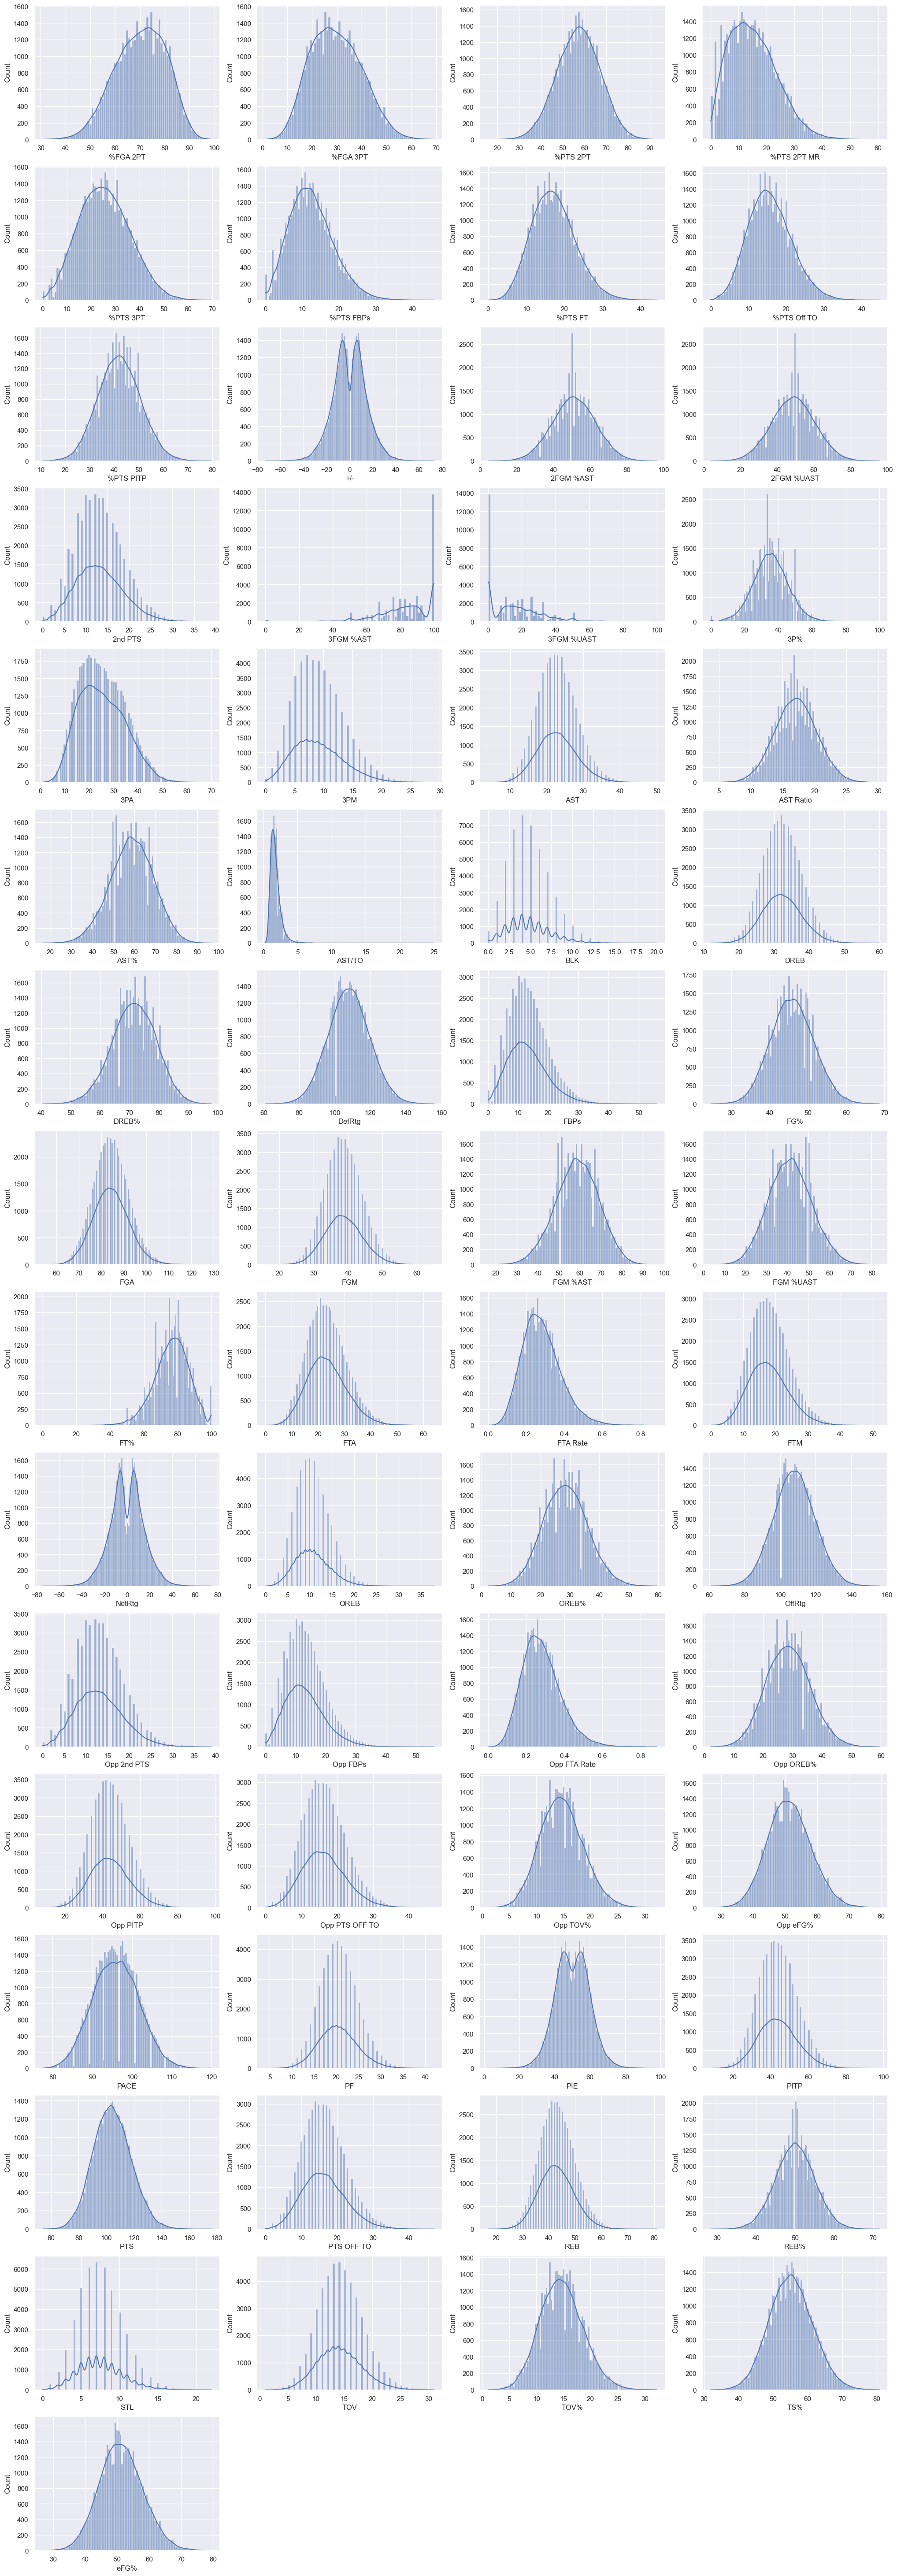

In [38]:
# plot histograms of the statistical columns

plot_rows = int((len(statistical_cols) / 4)) + 1
 
plot_columns = 4


sns.set_theme(rc={'figure.figsize':(25,75)})
for i, column in enumerate(statistical_cols, 1):
    plt.subplot(plot_rows,plot_columns,i)
    p=sns.histplot(x=column, data=games, stat='count', kde=True)

c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Chris\miniconda3\envs\nba_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

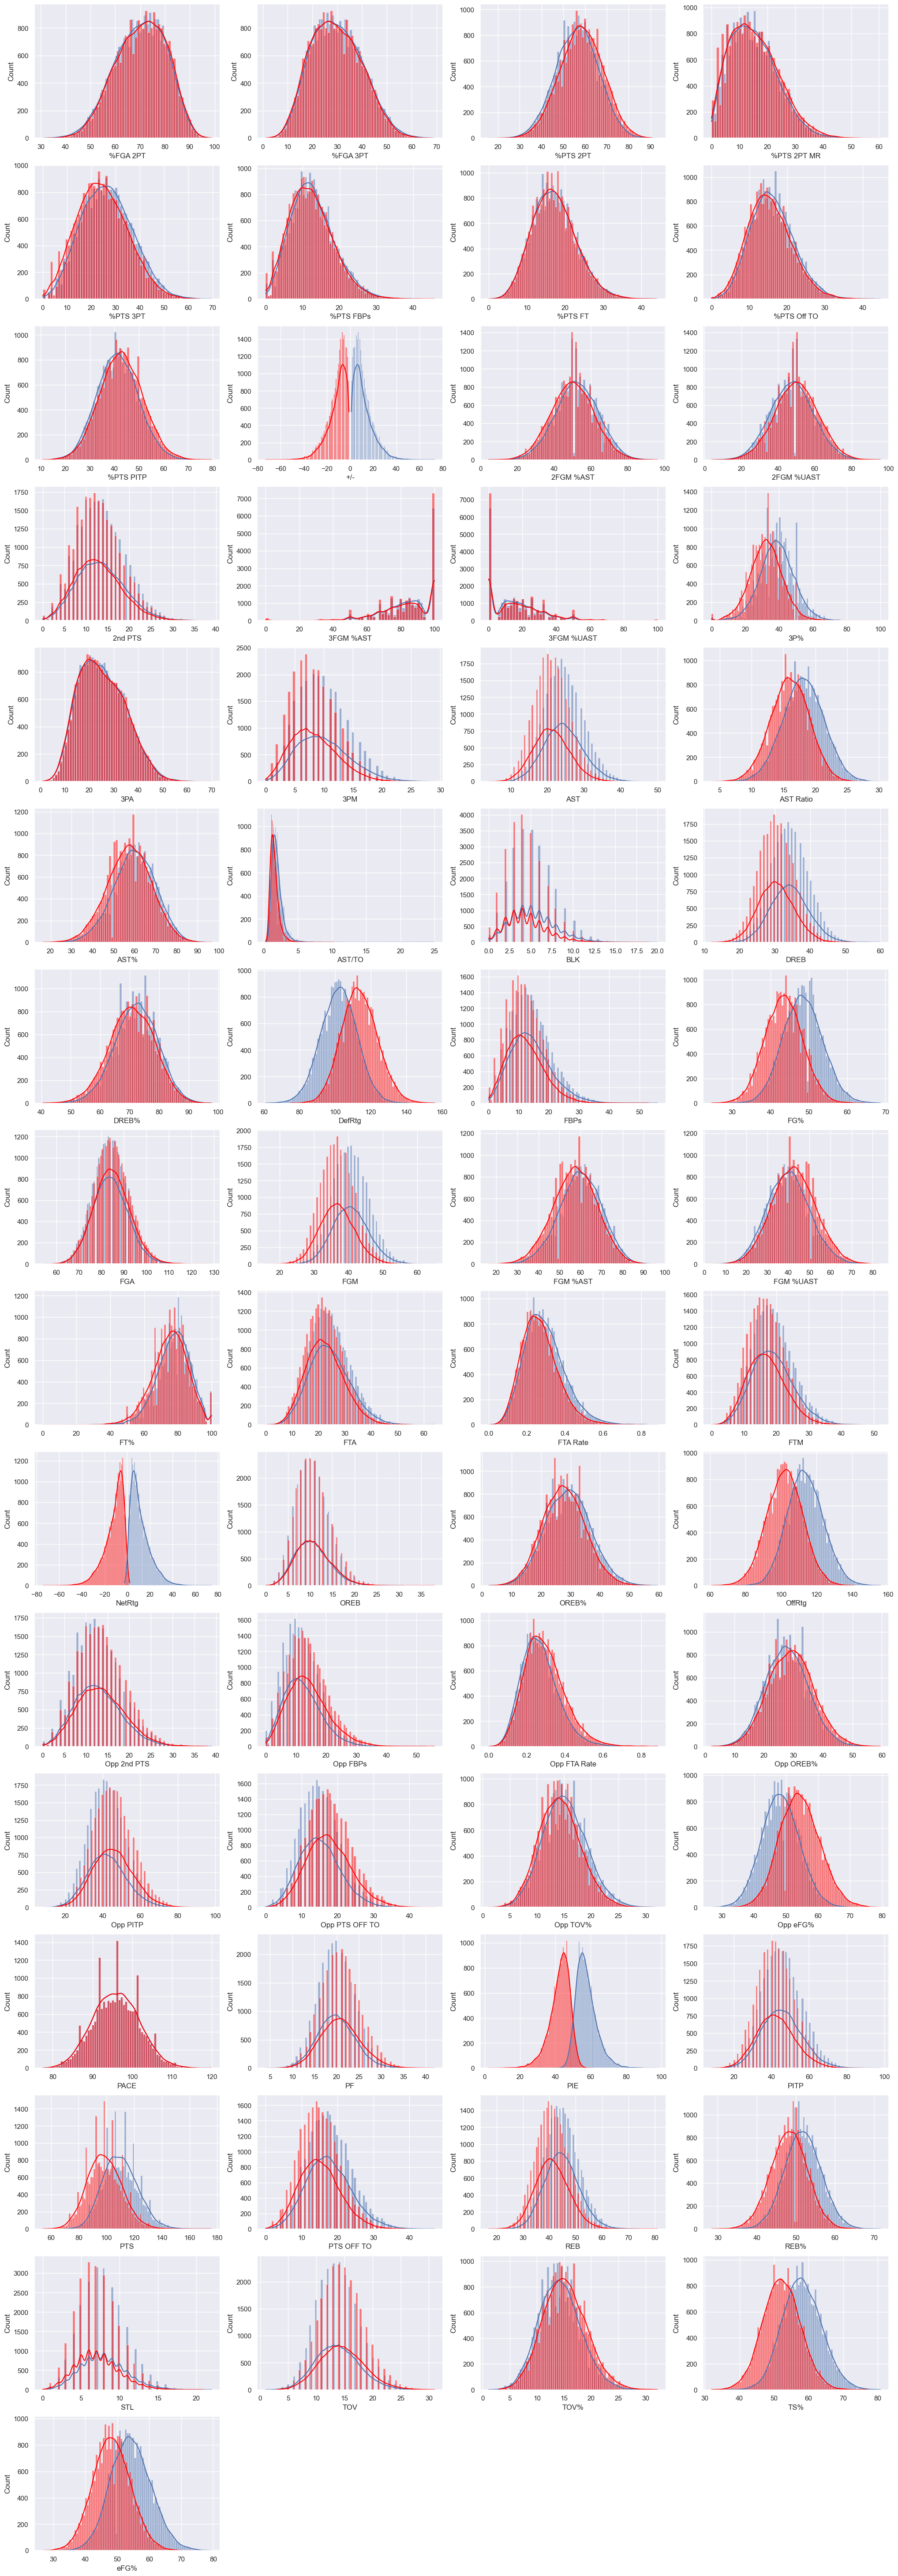

In [39]:
# compare winning game stats vs losing games stats

games_winners = games[games['W/L'] == 'W']
games_losers = games[games['W/L'] == 'L']



sns.set_theme(rc={'figure.figsize':(25,75)})
for i, column in enumerate(statistical_cols, 1):
    plt.subplot(plot_rows,plot_columns,i)
    p=sns.histplot(x=column, data=games_winners, stat='count', kde=True)
    p=sns.histplot(x=column, data=games_losers, stat='count', kde=True, color='red')


###
### Group data to check season-by-season variation


In [ ]:
# summarize data for each season to check season by season variation

value_list = ['GAME_ID', 'HOME_TEAM_WINS', 'PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
              'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 
             ]
agg_dict = {'GAME_ID': len, 'HOME_TEAM_WINS': np.sum, 'PTS_home': np.mean, 'PTS_away': np.mean,
           'FG_PCT_home': np.mean, 'FT_PCT_home': np.mean, 'FG3_PCT_home': np.mean, 'AST_home': np.mean, 'REB_home': np.mean,
           'FG_PCT_away': np.mean, 'FT_PCT_away': np.mean, 'FG3_PCT_away': np.mean, 'AST_away': np.mean, 'REB_away': np.mean,
           }

df = pd.pivot_table(games,index=['SEASON'],
                    values=value_list,
                    aggfunc=agg_dict,
                   )
df = df.reset_index()
df = df.rename(columns={'GAME_ID': 'GAMES_PLAYED',})

df['HOME_WIN_RATIO'] = df['HOME_TEAM_WINS'] / df['GAMES_PLAYED']

# move more interesting columns to front
column1 = df.pop('GAMES_PLAYED')
column2 = df.pop('HOME_TEAM_WINS')
column3 = df.pop('HOME_WIN_RATIO')
df.insert(1,'GAMES_PLAYED', column1)
df.insert(2,'HOME_TEAM_WINS', column2)
df.insert(3,'HOME_WIN_RATIO', column3)

df

In [ ]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    plt.xticks(rotation=65, horizontalalignment='right',)
    ax = sns.barplot(data=df, x='SEASON', y=column, color='blue')
 

NOTE - PTS, REB, AST have trended up the last several seasons, but Home win ratio is down

In [ ]:
df.describe().T

In [ ]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=df, stat='count',bins = 20)

### 
### Group to check team-by-team variation for one season

In [ ]:
# summarize data for each team during 2021 to check team-by-team variation

games2021 = games[games['SEASON']==2021]

value_list = ['GAME_ID', 'HOME_TEAM_WINS', 'PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
              'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 
             ]
agg_dict = {'GAME_ID': len, 'HOME_TEAM_WINS': np.sum, 'PTS_home': np.mean, 'PTS_away': np.mean,
           'FG_PCT_home': np.mean, 'FT_PCT_home': np.mean, 'FG3_PCT_home': np.mean, 'AST_home': np.mean, 'REB_home': np.mean,
           'FG_PCT_away': np.mean, 'FT_PCT_away': np.mean, 'FG3_PCT_away': np.mean, 'AST_away': np.mean, 'REB_away': np.mean,
           }

df = pd.pivot_table(games2021,index=['HOME_TEAM_ID'],
                    values=value_list,
                    aggfunc=agg_dict,
                   )

df = df.reset_index()
df = df.rename(columns={'GAME_ID': 'GAMES_PLAYED',})

df['HOME_WIN_RATIO'] = df['HOME_TEAM_WINS'] / df['GAMES_PLAYED']

# move more interesting columns to front
column1 = df.pop('GAMES_PLAYED')
column2 = df.pop('HOME_TEAM_WINS')
column3 = df.pop('HOME_WIN_RATIO')
df.insert(1,'GAMES_PLAYED', column1)
df.insert(2,'HOME_TEAM_WINS', column2)
df.insert(3,'HOME_WIN_RATIO', column3)

df

In [ ]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    plt.xticks(rotation=45, horizontalalignment='right',)
    ax = sns.barplot(data=df, x='HOME_TEAM_ID', y=column, color='blue')

In [ ]:
df.describe().T

In [ ]:
value_list = ['PTS_home', 'PTS_away', 
              'FG_PCT_home', 'FG_PCT_away', 
              'FG3_PCT_home', 'FG3_PCT_away',
              'FT_PCT_home', 'FT_PCT_away', 
              'REB_home', 'REB_away',
              'AST_home', 'AST_away', 
              'HOME_WIN_RATIO',
             ]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(4,4,i)
    p=sns.histplot(x=column, data=df, stat='count', bins = 20)

###
### Correlations

In [ ]:
# correlation bar chart

from matplotlib.colors import TwoSlopeNorm

df1 = games.drop(columns=['GAME_ID'])
#df1[cat_cols] = OrdinalEncoder().fit_transform(df1[cat_cols])

useful_columns =  df1.select_dtypes(include=['number']).columns

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0,df.shape[1]):
        for j in range(0,i+1):
            pairs_to_drop.add((cols[i],cols[j]))
    return pairs_to_drop

def get_correlations(df,n=30):
    au_corr = df.corr(method = 'spearman').unstack() #spearman used because not all data is normalized
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending=False)
    top_n = au_corr[0:n]    
    bottom_n =  au_corr[-n:]
    top_corr = pd.concat([top_n, bottom_n])
    return top_corr

corrplot = get_correlations(df1[useful_columns])


fig, ax = plt.subplots(figsize=(15,10))
norm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax =1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

print(corrplot)

corrplot.plot.barh(color=colors)

NOTE 
- FG_PCT and AST strongly correlated to PTS. 
- Opposing REB_PCT strongly negatively correlated to FG_PCT.

### Correlations vs TARGET (all seasons composite)

In [ ]:
# correlations vs target
df1 = games.drop(columns=['GAME_ID', TARGET])
#df1[cat_cols] = OrdinalEncoder().fit_transform(df1[cat_cols])

x = df1.corrwith(games[TARGET], method = 'spearman').sort_values(ascending=False)

print(x)

colors = [plt.cm.RdYlGn(norm(c)) for c in x.values]
x.plot.barh(color=colors)

x_all = x

NOTE - FG_PCT more correlated with winning than PTS

### Correlations vs TARGET 2021 only

In [ ]:
# correlations vs target
df1 = games.drop(columns=['GAME_ID', TARGET])
#df1[cat_cols] = OrdinalEncoder().fit_transform(df1[cat_cols])
df1 = df1[df1['SEASON']==2021]
targets = games[TARGET].loc[games['SEASON']==2021]

x = df1.corrwith(targets, method = 'spearman').sort_values(ascending=False)

print(x)

colors = [plt.cm.RdYlGn(norm(c)) for c in x.values]
x.plot.barh(color=colors)

x2021 = x

### Correlations vs TARGET (2017 thru 2021 composite)

In [ ]:
# correlations vs target
df1 = games.drop(columns=['GAME_ID', TARGET])
#df1[cat_cols] = OrdinalEncoder().fit_transform(df1[cat_cols])

df1 = df1[df1['SEASON'].astype(int) >2016]
targets = games[TARGET].loc[games['SEASON'].astype(int) >2016]

x = df1.corrwith(targets, method = 'spearman').sort_values(ascending=False)

print(x)

colors = [plt.cm.RdYlGn(norm(c)) for c in x.values]
x.plot.barh(color=colors)

x2017_2021 = x

### Correlation vs TARGET (All Seasons, Last 5 Seasons, Last Season)

In [ ]:
x = pd.concat([x_all, x2017_2021, x2021], axis=1).reset_index()
x = x.rename(columns={'index': 'STATS', 0: 'x_all', 1:'x2017_2021', 2:'x2021'})
print(x)

x.plot.barh(x='STATS')

NOTE - In recent seasons, the order for away teams changes: PTS_away > FG_PCT_away and REB_away > AST_away

###
# ranking.csv

This dataset contains an incremental daily record of the conference standings of each team as it changes each day of the season, updating with current stats such as: 
- games played
- games won
- games lost
- winning percentage
- home record
- road record


In [ ]:
ranking = pd.read_csv(DATAPATH / "ranking.csv")
ranking.head()

In [ ]:
ranking.info()

###
### Check for duplicates and nulls

In [ ]:
# duplicates
ranking.duplicated().sum()

In [ ]:
#null values
ranking.isnull().sum()

In [ ]:
# most rows have nulls in RETURNTOPLAY
# look at those that do not
ranking[ranking['RETURNTOPLAY'].notnull()]

In [ ]:
ranking[ranking['RETURNTOPLAY'] == 1]

In [ ]:
ranking[ranking['RETURNTOPLAY'] == 0]

In [ ]:
# are any in west conference?
df = ranking[ranking['RETURNTOPLAY'].notnull()]
df[df['CONFERENCE'] == 'West'].shape[0]

NOTE - Not sure what RETURNTOPLAY means, but it is limited to East Conference stats between 2020-03-12 and 2020-12-10, and is probably of almost no utility at the moment

In [ ]:
# any LEAGUE_ID not 0?
ranking[ranking['LEAGUE_ID'] != 0].shape[0]

NOTE - LEAGUE_ID always 0, can drop

In [ ]:
#these fields not needed for processing, analysis, or modeling

drop_fields = ['LEAGUE_ID', 'RETURNTOPLAY', 'TEAM']

#ranking = ranking.drop(drop_fields,axis=1)

###
### Describe the data


In [ ]:
# fix data types first

ranking['STANDINGSDATE'] = ranking['STANDINGSDATE'].astype('datetime64[ns]')

category_fields = ['TEAM_ID', 'CONFERENCE', 'SEASON_ID']

for cat in category_fields:
    ranking[cat] = ranking[cat].astype('category')

In [ ]:
ranking.describe(include = 'category').T

In [ ]:
# why 39 SEASON_IDs?
ranking['SEASON_ID'].value_counts()

In [ ]:
ranking[(ranking['SEASON_ID']==12021) & (ranking['G'] > 0)]

In [ ]:
df = ranking[(ranking['SEASON_ID']==12021)]
df.describe().T

NOTE - SEASON_ID beginning with 1 appears to be preseason games

In [ ]:
#flag preseaon stats
ranking['PRESEASON'] = ((ranking['SEASON_ID'].astype('int') < 20000).astype('int')).astype('category')
ranking

In [ ]:
#home record and road record need to be converted to numeric

ranking['HOME_W'] = ranking['HOME_RECORD'].apply(lambda x: x.split('-')[0]).astype('int')
ranking['HOME_L'] = ranking['HOME_RECORD'].apply(lambda x: x.split('-')[1]).astype('int')
ranking['HOME_W_PCT'] = ranking['HOME_W'] / ( ranking['HOME_W'] + ranking['HOME_L'] )

ranking['ROAD_W'] = ranking['ROAD_RECORD'].apply(lambda x: x.split('-')[0]).astype('int')
ranking['ROAD_L'] = ranking['ROAD_RECORD'].apply(lambda x: x.split('-')[1]).astype('int')
ranking['ROAD_W_PCT'] = ranking['ROAD_W'] / ( ranking['ROAD_W'] + ranking['ROAD_L'] )


In [ ]:
df = ranking[ranking['PRESEASON']==0]
df.describe().T

## Validation

In [ ]:
# check that key fields are always increasing since they represent running totals

df = ranking[ranking['PRESEASON']==0]

seasons = df["SEASON_ID"].unique().to_list()
teams = df["TEAM_ID"].unique().to_list()
fields = ['G','W','L','HOME_W','HOME_L','ROAD_W','ROAD_L'] 

for season in seasons:
    for team in teams:
        df = ranking[(ranking['SEASON_ID'] == season) & (ranking['TEAM_ID'] == team)]
        df = df.set_index('STANDINGSDATE')
        df = df.sort_index(ascending=True)
        
        for field in fields:
            increasing = df[field].is_monotonic_increasing
            if not(increasing):
                print("Not increasing:", season, team, field)



In [ ]:
#sample 5 records to validate against historical record on google

df = ranking[ranking['PRESEASON']==0]
df.sample(n=5)

In [ ]:
#saved output
#verified at: https://www.basketball-reference.com/leagues/NBA_2012_standings_by_date_eastern_conference.html

#TEAM_ID	LEAGUE_ID	SEASON_ID	STANDINGSDATE	CONFERENCE	TEAM	G	W	L	W_PCT	HOME_RECORD	ROAD_RECORD	RETURNTOPLAY	PRESEASON	HOME_W	HOME_L	HOME_W_PCT	ROAD_W	ROAD_L	ROAD_W_PCT
#95703	1610612757	0	22017	2017-11-09	West	Portland	11	6	5	0.545	4-3	2-2	NaN	0	4	3	0.571429	2	2	0.500000
#127548	1610612739	0	22011	2012-01-17	East	Cleveland	13	6	7	0.462	2-2	4-5	NaN	0	2	2	0.500000	4	5	0.444444
#124706	1610612766	0	22011	2012-07-25	East	Charlotte	66	7	59	0.106	4-29	3-30	NaN	0	4	29	0.121212	3	30	0.090909
#179631	1610612766	0	22017	2018-09-17	East	Charlotte	82	36	46	0.439	21-20	15-26	NaN	0	21	20	0.512195	15	26	0.365854
#45342	1610612758	0	22010	2010-12-12	West	Sacramento	21	5	16	0.238	3-10	2-6	NaN	0	3	10	0.230769	2	6	0.250000


In [ ]:
# make sure each date only has data for 30 teams
# from the later merge process in data processing, there appears to be an issue
df = ranking.groupby(['STANDINGSDATE']).count()
df = df.reset_index()
df
df[df['TEAM_ID'] > 30]

In [ ]:
df = ranking[ranking['STANDINGSDATE'] == '2020-12-28']
df['TEAM_ID'].value_counts()

In [ ]:
df[df['TEAM_ID'] == 1610612752]

In [ ]:
df = df[df['TEAM_ID'] == 1610612752]
df.duplicated()

NOTE - Duplicates exist, pandas appears not to recognize them as duplicates

###
## game_details.csv

In [ ]:
details = pd.read_csv(DATAPATH / "games_details.csv")
details

In [ ]:
details.info()

NOTE - MIN (minutes played) appears to be in mixed formats - integer minutes and MIN:SEC format

TEAM_ABBREVIATION, TEAM_CITY, PLAYER_NAME, NICKNAME are not needed and can be linked to index tables if needed

###
### Check for duplicates and nulls

In [ ]:
# duplicates
details.duplicated().sum()

In [ ]:
#null values
details.isnull().sum()

In [ ]:
#the 105603 nulls across all the key stats seems most important
details[details['MIN'].isna()]

--    
**COMMENT field**

In [ ]:
# the COMMENT field seems to indicate when the player did not play
pd.set_option('display.max_rows', 20)
df = details[details['MIN'].isna()]
df['COMMENT'].value_counts()

In [ ]:
# DNP - Did not play, DND - did not dress, NWT - not with team
# are any of these null?
df['COMMENT'].isna().sum()

In [ ]:
#which one?
df[df['COMMENT'].isna()]

NOTE - records where all stats are missing indicates games where that player did not play. This is indicated in the COMMENT field except for the one record above

In [ ]:
#check pattern
df[df['COMMENT'].str[4:5] != '-']

NOTE - 1121 records do not follow the "XXX -" pattern

In [ ]:
#list the comments that do not follow the pattern
df['COMMENT'][df['COMMENT'].str[4:5] != '-'].value_counts()

In [ ]:
#list any comments when stats not null
df = details[details['MIN'].notna()]
df['COMMENT'].value_counts().sum()

NOTE - COMMENT only used when player did not play

--      
**MIN field**

Minutes played seems to have mixed data: integer minutes and MIN:SEC

In [ ]:
details['MIN'].value_counts()

In [ ]:
# see if any values are left if we filter out nulls, isdigit(), and strings with ":"
df = details[details['MIN'].notna()]
df = df[~df['MIN'].str.isdigit()]
df = df[~df['MIN'].str.contains(':')]
df
df[df['GAME_ID'] == 10800045]

NOTE - 12 records have negative minutes played

In [ ]:
# convert MIN:SEC to float

df = details.loc[details['MIN'].str.contains(':',na=False)]
df['MIN_whole'] = df['MIN'].apply(lambda x: x.split(':')[0]).astype("int8")
df['MIN_seconds'] = df['MIN'].apply(lambda x: x.split(':')[1]).astype("int8")
df['MIN'] = df['MIN_whole'] + (df['MIN_seconds'] / 60)

details['MIN'].loc[details['MIN'].str.contains(':',na=False)] = df['MIN']
details['MIN'] = details['MIN'].astype("float64")

# convert negatives to positive
details['MIN'].loc[details['MIN'] < 0] = -(df['MIN'])

details


--     
**START_POSITION field**

In [ ]:
details['START_POSITION'].value_counts()

NOTE - maybe convert nulls to a character if player did play but did not start

### describe data

In [ ]:
details.describe(include = 'float').T.applymap('{:,.4f}'.format)

###
### Check distributions

In [ ]:
value_list = details.select_dtypes(include=['float']).columns.to_list()

df = details[details['MIN'].notna()]

sns.set(rc={'figure.figsize':(25,25)})
for i, column in enumerate(value_list, 1):
    plt.subplot(5,4,i)
    ax=sns.histplot(x=column, data=df, stat='count')

### check outliers 

**96 minutes in one game**

In [ ]:
#list games where players played more than 60 minutes
df.loc[df['MIN'] > 60]

NOTE - Just 19 records, many in the same game, which indicates an extended overtime game

**field goal attempts**

In [ ]:
df.loc[df['FGA'] > 40]

NOTE - according to a google search, the 50 FGA by Kobe Bryant is correct

**free throw attempts**

In [ ]:
df.loc[df['FTA'] > 30]

NOTE - according to a google search, the 39 FTA by Dwight Howard are correct